<a href="https://colab.research.google.com/github/Ness731/kgu_bootcamp/blob/main/huristic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Input_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head

<bound method NDFrame.head of     NO.  XCOORD.  YCOORD.
0     0        0        0
1     1       50       13
2     2       47       24
3     3        5       15
4     4        5        1
..  ...      ...      ...
95   95       33       11
96   96       42       28
97   97       17       38
98   98       41       25
99   99       19        3

[100 rows x 3 columns]>

In [ ]:
df = data.drop('NO.', axis=1)
df.head

<bound method NDFrame.head of     XCOORD.  YCOORD.
0         0        0
1        50       13
2        47       24
3         5       15
4         5        1
..      ...      ...
95       33       11
96       42       28
97       17       38
98       41       25
99       19        3

[100 rows x 2 columns]>

In [ ]:
# 잔여도시
remain = df[1:100].values.tolist()
remain

[[50, 13],
 [47, 24],
 [5, 15],
 [5, 1],
 [44, 44],
 [27, 10],
 [38, 21],
 [24, 31],
 [41, 12],
 [47, 39],
 [44, 4],
 [50, 31],
 [32, 12],
 [17, 12],
 [27, 41],
 [18, 31],
 [19, 20],
 [22, 49],
 [11, 38],
 [12, 31],
 [39, 47],
 [12, 39],
 [42, 20],
 [15, 25],
 [40, 22],
 [5, 39],
 [1, 23],
 [20, 17],
 [40, 33],
 [20, 8],
 [48, 21],
 [18, 34],
 [41, 1],
 [13, 41],
 [18, 2],
 [0, 27],
 [24, 1],
 [45, 0],
 [4, 37],
 [35, 21],
 [4, 31],
 [13, 20],
 [42, 41],
 [1, 6],
 [9, 17],
 [1, 49],
 [29, 33],
 [6, 26],
 [27, 21],
 [47, 28],
 [49, 30],
 [8, 5],
 [17, 31],
 [34, 6],
 [24, 45],
 [19, 21],
 [46, 9],
 [45, 36],
 [30, 22],
 [15, 23],
 [37, 19],
 [40, 8],
 [36, 19],
 [27, 44],
 [45, 6],
 [47, 37],
 [7, 29],
 [42, 2],
 [45, 24],
 [31, 36],
 [31, 6],
 [22, 50],
 [36, 40],
 [20, 37],
 [8, 17],
 [2, 18],
 [24, 4],
 [8, 5],
 [12, 7],
 [46, 50],
 [16, 46],
 [26, 45],
 [27, 44],
 [25, 29],
 [34, 24],
 [28, 6],
 [36, 15],
 [17, 6],
 [48, 16],
 [46, 23],
 [0, 12],
 [20, 14],
 [28, 0],
 [20, 6],
 [33,

In [ ]:
# 타겟도시 - 초기화는 0번째 도시
target = df[0:1].values.tolist()
target

[[0, 0]]

In [ ]:
# 타겟 도시와의 거리를 구하는 함수
def get_dist(target, remain):
  dist = []
  tx = target[0][0]
  ty = target[0][1]
  for x,y in remain : 
    d =  math.sqrt(pow((tx - x), 2) + pow((ty - y), 2)) # 거리 구하기
    dist.append(d)
  return dist

In [ ]:
def get_minimun(dist):
  min = dist[0]
  for d in dist :
    if(min > d) : 
      min = d
  return dist.index(min)

In [ ]:
dist = get_dist(target, remain)
idx = get_minimun(dist)
[remain[idx]]

[[5, 1]]

In [ ]:
origin = remain
origin.index([remain[idx][0], remain[idx][1]])

3

In [ ]:
route = [0] # 출발 도시는 0번
origin = remain
start = df[0:1].values.tolist()
def greedy(target, remain):
  greedy_dist = 0
  # 아래의 알고리즘을 모든 도시에 대해 반복한다.
  while len(remain) > 0 :
    # 1. 타겟과 나머지 다른 모든 도시와의 거리를 구한다.
    dst = get_dist(target, remain)
    
    # 2. 거리가 최소인 도시의 인덱스를 구한다.
    min_idx = get_minimun(dst)
    greedy_dist += dst[min_idx]
    # 3. 해당 인덱스를 경로에 추가한다.
    # 이 때, 인덱스는 중간에 변경되기 때문에 원본과 다르므로, 원본의 인덱스를 찾아야 한다.
    # 따라서 먼저 값을 참조한 후, 원본 리스트에서 해당 값의 인덱스를 검색한다.
    val = remain[min_idx]
    origin_index = origin.index([val[0], val[1]])
    route.append(origin_index)

    # 4. 타겟 도시를 방금 추가한 도시로 설정한다. 
    target = [remain[min_idx]]

    # 5. 남아있는 도시에서 방금 추가한 도시를 제거한다.
    remain = np.delete(remain, min_idx, axis=0)

  last = origin[route[-1]]
  d =  math.sqrt(pow((0 - last[0]), 2) + pow((0 - last[1]), 2)) # 거리 구하기
  greedy_dist += d

  # 마지막 경유지는 0번째 도시
  route.append(0)

  print("최종거리 : ")
  print(greedy_dist)
  return route

In [ ]:
result = greedy(target, remain)

최종거리 : 
523.7415420152441


In [ ]:
len(result)

101

In [ ]:
result

[0,
 3,
 51,
 51,
 78,
 87,
 93,
 29,
 13,
 91,
 27,
 16,
 55,
 59,
 23,
 41,
 44,
 74,
 2,
 75,
 26,
 35,
 40,
 66,
 47,
 19,
 52,
 15,
 31,
 73,
 96,
 33,
 21,
 18,
 25,
 38,
 45,
 80,
 17,
 71,
 54,
 81,
 63,
 63,
 14,
 69,
 46,
 7,
 83,
 48,
 58,
 84,
 39,
 62,
 60,
 6,
 24,
 22,
 68,
 89,
 1,
 30,
 88,
 0,
 56,
 64,
 10,
 67,
 32,
 37,
 61,
 8,
 86,
 12,
 94,
 53,
 70,
 85,
 5,
 76,
 36,
 92,
 98,
 34,
 43,
 90,
 97,
 95,
 49,
 50,
 11,
 65,
 9,
 57,
 28,
 72,
 42,
 4,
 20,
 79,
 0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
graph = []
for i in result :
  xy = origin[i]
  graph.append(xy)
graph.pop(0)
graph.pop()
graph.append([0,0])
graph.insert(0, [0,0])
graph

[[0, 0],
 [5, 1],
 [8, 5],
 [8, 5],
 [12, 7],
 [17, 6],
 [20, 6],
 [20, 8],
 [17, 12],
 [20, 14],
 [20, 17],
 [19, 20],
 [19, 21],
 [15, 23],
 [15, 25],
 [13, 20],
 [9, 17],
 [8, 17],
 [5, 15],
 [2, 18],
 [1, 23],
 [0, 27],
 [4, 31],
 [7, 29],
 [6, 26],
 [12, 31],
 [17, 31],
 [18, 31],
 [18, 34],
 [20, 37],
 [17, 38],
 [13, 41],
 [12, 39],
 [11, 38],
 [5, 39],
 [4, 37],
 [1, 49],
 [16, 46],
 [22, 49],
 [22, 50],
 [24, 45],
 [26, 45],
 [27, 44],
 [27, 44],
 [27, 41],
 [31, 36],
 [29, 33],
 [24, 31],
 [25, 29],
 [27, 21],
 [30, 22],
 [34, 24],
 [35, 21],
 [36, 19],
 [37, 19],
 [38, 21],
 [40, 22],
 [42, 20],
 [45, 24],
 [46, 23],
 [47, 24],
 [48, 21],
 [48, 16],
 [50, 13],
 [46, 9],
 [45, 6],
 [44, 4],
 [42, 2],
 [41, 1],
 [45, 0],
 [40, 8],
 [41, 12],
 [36, 15],
 [32, 12],
 [33, 11],
 [34, 6],
 [31, 6],
 [28, 6],
 [27, 10],
 [24, 4],
 [24, 1],
 [28, 0],
 [19, 3],
 [18, 2],
 [1, 6],
 [0, 12],
 [41, 25],
 [42, 28],
 [47, 28],
 [49, 30],
 [50, 31],
 [47, 37],
 [47, 39],
 [45, 36],
 [40, 33

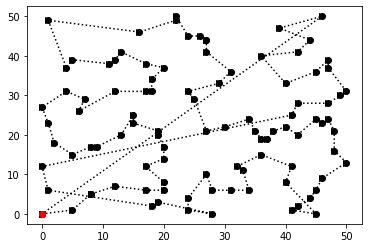

In [ ]:
x= [i[0] for i in graph]
y= [i[1] for i in graph]
plt.scatter(x, y, color='k')
plt.plot(x, y, marker = '>', linestyle= 'dotted', color = 'k')
plt.plot(0, 0, marker = 'o', color='red')
plt.show()